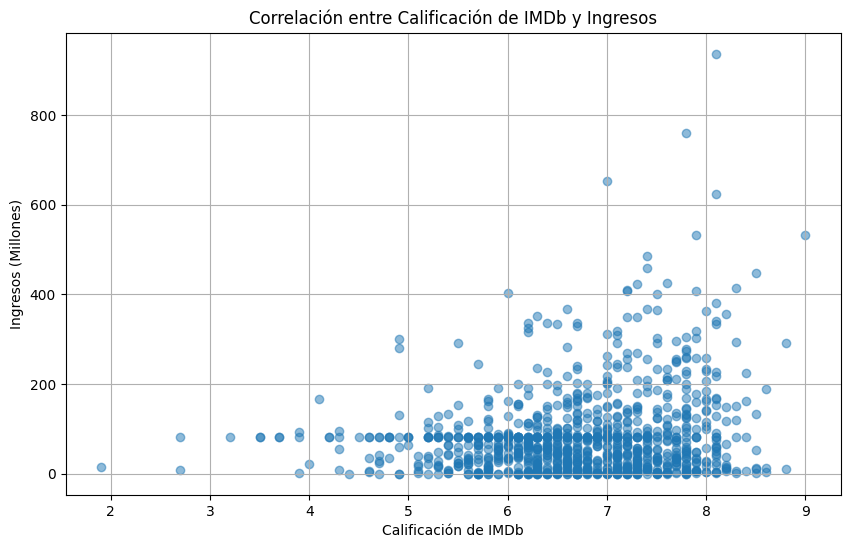

Valoración media: 6.723199999999999
Película más larga: Grindhouse con 191 minutos
Ingresos medios: 82.96
Ingresos mediana: 60.38
Valoración media de los últimos 10 años: 94088.39655172414
0.19


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga del dataset y selección de columnas relevantes
df = pd.read_csv('https://drive.google.com/uc?export=download&id=109djyjiJIEwJ3sLg2X7Th45ulYOXC2gY')
columns_of_interest = ['Title','Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']
data = df[columns_of_interest]

# Extrayendo las columnas de calificación y de ingresos

ratings = df['Rating']
revenues = df['Revenue (Millions)']

# Manejando valores faltantes en los ingresos con pandas (por uso en compración con numpy)

revenues.fillna(revenues.mean(), inplace=True)
# pandas.mean == numpy.nanmean
# Creando el gráfico de dispersión

plt.figure(figsize=(10, 6))

plt.scatter(ratings, revenues, alpha=0.5)

plt.title('Correlación entre Calificación de IMDb y Ingresos')

plt.xlabel('Calificación de IMDb')

plt.ylabel('Ingresos (Millones)')

plt.grid(True)

plt.show()


# Convertir a un array de Numpy y manejo de valores faltantes
np_data = data.to_numpy()

revenue_column = np_data[:, -1].astype(float)  # Quinta columna (: es para indicar que seleccionamos columnas, np_data[4] será la 4 fila) Revenue (Millions)
mean_revenue = np.nanmean(revenue_column.astype(float))
revenue_column[np.isnan(revenue_column)] = mean_revenue

# Análisis estadístico
average_rating = np.mean(np_data[:, 3].astype(float))
print("Valoración media: " + str(average_rating))

longest_movie = np_data[np.argmax(np_data[:, 2].astype(int))]
print("Película más larga: " + str(longest_movie[0]) + " con " + str(longest_movie[2]) + " minutos")

average_revenue = np.mean(revenue_column.astype(float))
print("Ingresos medios: " + str(round(average_revenue, 2)))

# Una opción (otro ejemplo) para no incluir vlaores nulos es uasr la negación: ~ como en ~np.isnan(revenue_column)
median_revenue = np.median(revenue_column[~np.isnan(revenue_column)].astype(float))
print("Ingresos mediana: " + str(round(median_revenue, 2)))


# Manipulación de datos
recent_movies = np_data[np_data[:, 1].astype(int) >= 2014]  # Películas de los últimos 10 años
average_votes_recent = np.mean(recent_movies[:, 4].astype(int))
print("Valoración media de los últimos 10 años: " + str(average_votes_recent))

# Desafío adicional: correlación entre calificación y ingresos
correlation = np.corrcoef(np_data[:, 3].astype(float), revenue_column.astype(float))[0, 1]
print(round(correlation, 2))
